In [22]:
import pandas as pd

from news_vec.utils import read_json_gz_lines

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [24]:
rows_lr, rows_svc = [], []
for r in read_json_gz_lines('../../data/clf-ab-cm.json'):
    rows_lr += r['cm_lr']
    rows_svc += r['cm_svc']

In [25]:
df_lr = pd.DataFrame(rows_lr)
df_svc = pd.DataFrame(rows_svc)

In [26]:
df_lr['label'] = df_lr[['d1', 'd2']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)
df_svc['label'] = df_svc[['d1', 'd2']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

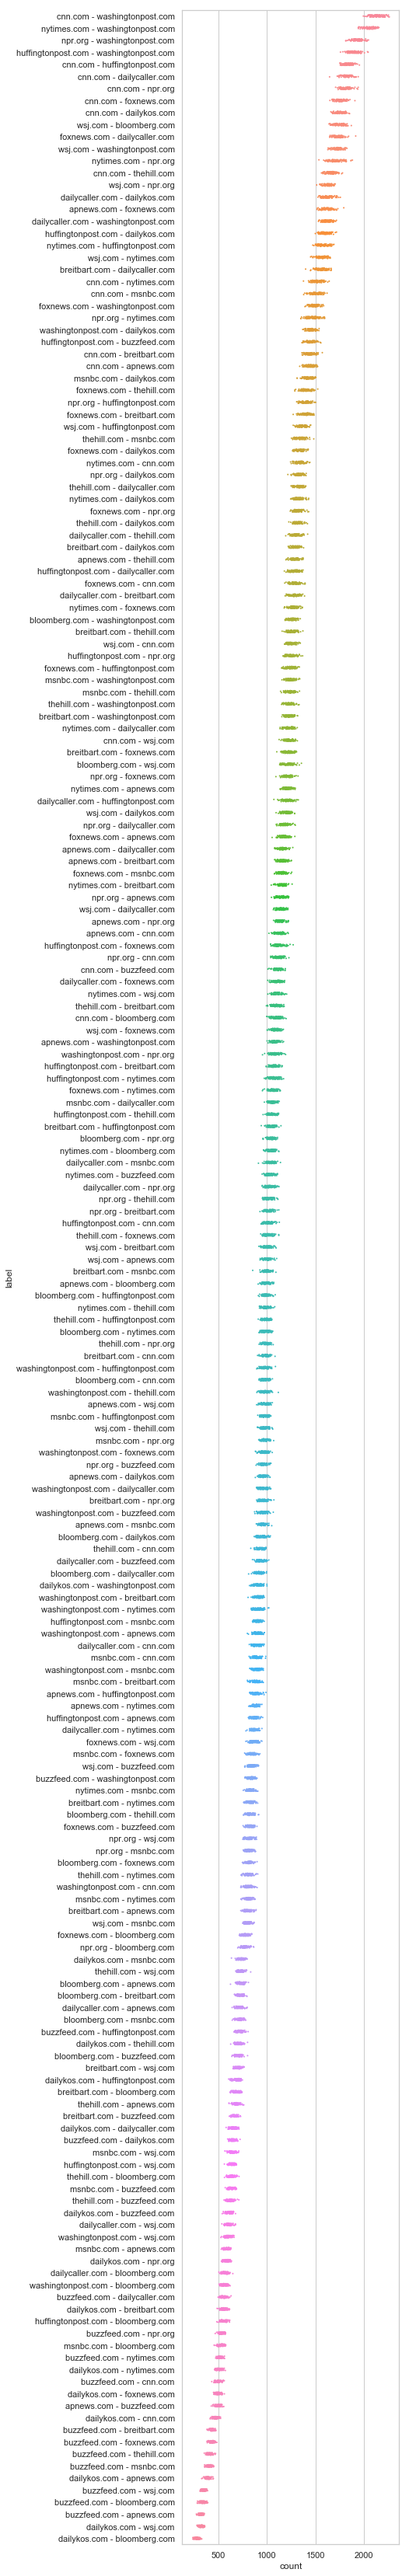

In [27]:
order = df_lr.groupby('label').mean()['count'].sort_values(ascending=False).index
plt.figure(figsize=(5,60))
sns.stripplot(x='count', y='label', data=df_lr, order=order, s=2)

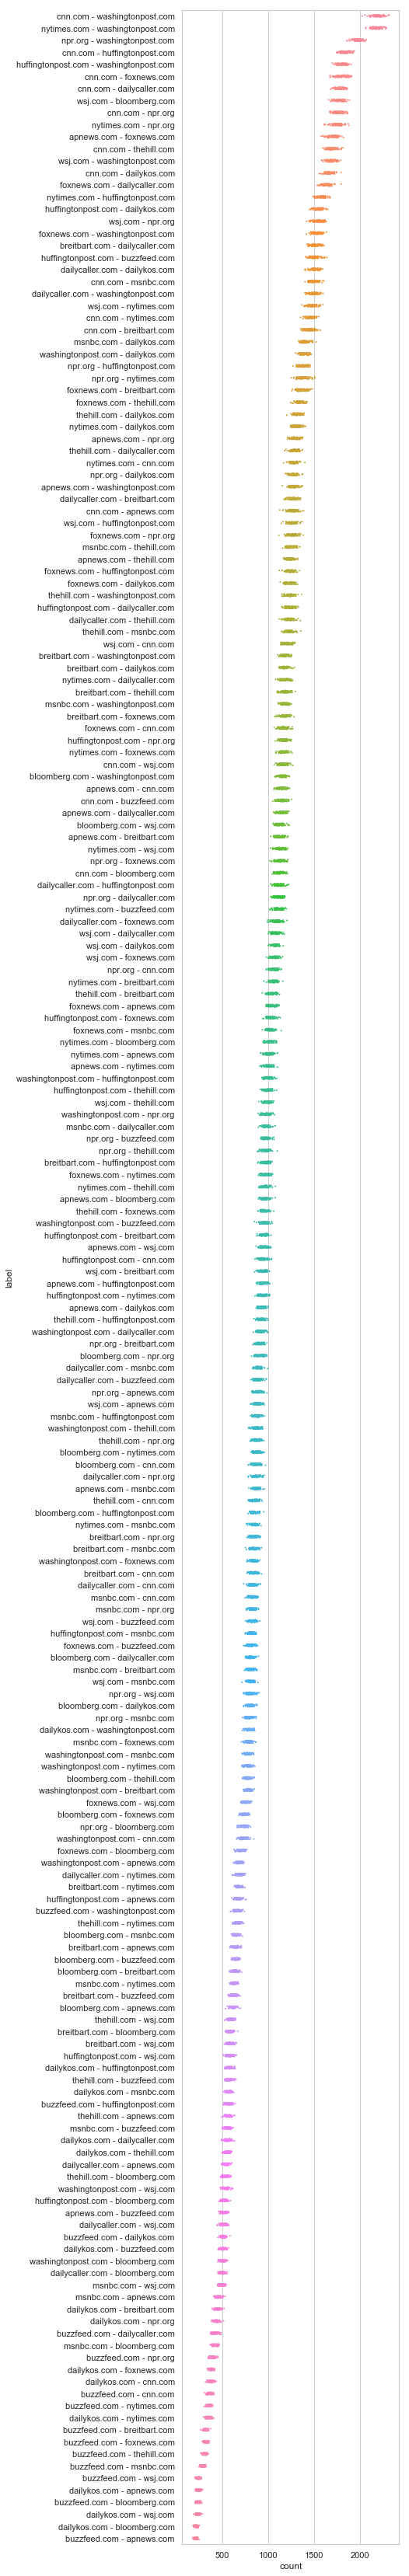

In [28]:
order = df_svc.groupby('label').mean()['count'].sort_values(ascending=False).index
plt.figure(figsize=(5,60))
sns.stripplot(x='count', y='label', data=df_svc, order=order, s=2)

In [29]:
out_lr = df_lr.groupby(['d1', 'd2']).mean().reset_index()
out_svc = df_svc.groupby(['d1', 'd2']).mean().reset_index()

In [30]:
out_lr.to_json('data/hl-graph-ab-cm-lr.json', orient='records', lines=True)
out_svc.to_json('data/hl-graph-ab-cm-svc.json', orient='records', lines=True)